In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


In [3]:
df = pd.read_csv(r"C:\Users\SASUB\Downloads\1651277648862_healthinsurance.csv")

In [4]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [6]:
mean_age = df.groupby("sex")['age'].mean()
mean_bmi = df.groupby("sex")['bmi'].mean()
print(f'mean age per sex:', mean_age)
print(f'mean bmi per sex:', mean_bmi)

mean age per sex: sex
female    39.361040
male      39.738395
Name: age, dtype: float64
mean bmi per sex: sex
female    29.808176
male      30.757501
Name: bmi, dtype: float64


In [7]:
df['age'] = df['age'].fillna(df.groupby("sex")["age"].transform("mean"))
df['bmi'] = df['bmi'].fillna(df.groupby("sex")["bmi"].transform("mean"))

In [8]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [9]:
columns = [col for col in data.columns if data[col].dtype == 'object']
le = LabelEncoder()
for col in columns:
    data[col] = le.fit_transform(data[col].astype(str))

In [10]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


In [11]:
data['city'].nunique()

91

In [12]:
data['job_title'].nunique()

35

In [13]:
df['job_title'].value_counts().head()

job_title
Student       1320
HomeMakers     972
Singer         744
Actor          720
FilmMaker      714
Name: count, dtype: int64

In [14]:
# log transformed due to right skweness of the data
data['log_claim'] = np.log1p(data['claim'])


In [15]:
X = data.drop(['claim', 'weight','log_claim'], axis = 1)
y_log = data[['log_claim']]
y = data[['claim']]

## **random forest regresssor**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y_log, test_size = 0.3, random_state = 42)

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\SASUB\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [18]:
rf.feature_importances_

array([0.35654874, 0.01022348, 0.06195658, 0.01260238, 0.03716841,
       0.42155177, 0.00319496, 0.03970102, 0.00913898, 0.0091586 ,
       0.03875508])

In [19]:
X.columns

Index(['age', 'sex', 'bmi', 'hereditary_diseases', 'no_of_dependents',
       'smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex',
       'job_title'],
      dtype='object')

In [20]:
train_pred_rf = rf.predict(X_train)
print('RMSE for training data:', np.sqrt(mean_squared_error(y_train, train_pred_rf)))
test_pred_rf = rf.predict(X_test)
print('RMSE for test data:', np.sqrt(mean_squared_error(y_test, test_pred_rf)))

RMSE for training data: 0.05605656504703675
RMSE for test data: 0.15703594649973618


In [21]:
rf_train_pred_actual = np.expm1(train_pred_rf)
rf_y_train_actual = np.expm1(y_train)

rf_test_pred_actual = np.expm1(test_pred_rf)
rf_y_test_actual = np.expm1(y_test)

rf_rmse_train = np.sqrt(mean_squared_error(rf_y_train_actual, rf_train_pred_actual))
rf_rmse_test = np.sqrt(mean_squared_error(rf_y_test_actual, rf_test_pred_actual))

print('RMSE for training data:',rf_rmse_train)
print('RMSE for test data:',rf_rmse_test)

RMSE for training data: 1042.149744878894
RMSE for test data: 2249.959486233892


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100,150],                
    'max_depth': [11],
    'min_samples_split': [7],
    'min_samples_leaf': [1],       
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
# Create the Random Forest model
rf_gs = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_gs,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # RMSE is based on MSE
    n_jobs=-1,               # Use all CPUs
    verbose=2
)

# Fit the grid search to your data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\SASUB\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters found: {'bootstrap': True, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 150}


In [74]:
best_params = grid_search.best_params_
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)


C:\Users\SASUB\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_split=7,
                      n_estimators=150, random_state=42)

In [75]:
y_pred_train = final_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Train RMSE: {rmse}")

y_pred_test = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {rmse}")


Train RMSE: 0.2134364114904983
Test RMSE: 0.2535863286113098


In [76]:
rfgs_train_pred_actual = np.expm1(y_pred_train)
rfgs_y_train_actual = np.expm1(y_train)

rfgs_test_pred_actual = np.expm1(y_pred_test)
rfgs_y_test_actual = np.expm1(y_test)

rfgs_rmse_train = np.sqrt(mean_squared_error(rfgs_y_train_actual, rfgs_train_pred_actual))
rfgs_rmse_test = np.sqrt(mean_squared_error(rfgs_y_test_actual, rfgs_test_pred_actual))

print('RMSE for training data:',rfgs_rmse_train)  
print('RMSE for test data:',rfgs_rmse_test)

RMSE for training data: 3082.590116906064
RMSE for test data: 3590.1966636066477


In [77]:

mape_train_rfgs = mean_absolute_percentage_error(rfgs_y_train_actual, rfgs_train_pred_actual) * 100
mape_test_rfgs = mean_absolute_percentage_error(rfgs_y_test_actual, rfgs_test_pred_actual) * 100

print(f"Train MAPE: {mape_train_rfgs:.2f}%")
print(f"Test MAPE: {mape_test_rfgs:.2f}%")


Train MAPE: 11.52%
Test MAPE: 13.71%


# **XGB regressor**

In [226]:
# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [250],
    'max_depth': [4, 5, 6],                      # Shallower trees = less overfit
    'learning_rate': [0.09],         # Lower = slower learning, combine with higher n_estimators
    'subsample': [1.0],                     # Random row sampling = better generalization
    'colsample_bytree': [0.8],              # Random feature sampling = reduces reliance on specific features
    'min_child_weight': [1, 5, 10],              # Larger = less complex trees
    'gamma': [0, 1, 5],                          # Higher = only split when gain is high
    'reg_alpha': [0, 0.1, 1],                    # L1 regularization = sparse weights
    'reg_lambda': [1, 5, 10]                     # L2 regularization = smooth weights
}

# Grid Search setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_model_xgb = grid_search.best_estimator_
print(best_model_xgb)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, ...)


In [227]:
pred_train = best_model_xgb.predict(X_train)
rmse_xgb = np.sqrt(mean_squared_error(y_train, pred_train))
print(f"Train RMSE: {rmse_xgb}")

pred_test = best_model_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_test))
print(f"Test RMSE: {rmse_xgb}")

Train RMSE: 0.12261589580073055
Test RMSE: 0.18665304224887774


In [228]:
train_pred_actual_xgb = np.expm1(pred_train)
y_train_actual_xgb = np.expm1(y_train)

test_pred_actual_xgb = np.expm1(pred_test)
y_test_actual_xgb = np.expm1(y_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train_actual_xgb, train_pred_actual_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_actual_xgb, test_pred_actual_xgb))

print('RMSE for training data of xgb:',rmse_train_xgb)
print('RMSE for test data of xgb:',rmse_test_xgb)

RMSE for training data of xgb: 1973.9525070274615
RMSE for test data of xgb: 2782.49645103098


In [229]:
xgb_mape_train = mean_absolute_percentage_error(y_train_actual_xgb, train_pred_actual_xgb) * 100
xgb_mape_test = mean_absolute_percentage_error(y_test_actual_xgb, test_pred_actual_xgb) * 100

print(f"Train MAPE for XGB: {xgb_mape_train:.2f}%")
print(f"Test MAPE for XGB: {xgb_mape_test:.2f}%")

Train MAPE for XGB: 6.53%
Test MAPE for XGB: 9.05%


# **SVR**

In [26]:
## scaled data for svr and lr

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)


In [27]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_log , test_size = 0.3, random_state = 42)

In [28]:
svr = SVR()
svr.fit(X_train_scaled,y_train_scaled)

C:\Users\SASUB\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [29]:
train_pred_svr = svr.predict(X_train_scaled)
print('RMSE for training data:', np.sqrt(mean_squared_error(y_train_scaled, train_pred_svr)))
test_pred_svr = svr.predict(X_test_scaled)
print('RMSE for test data:', np.sqrt(mean_squared_error(y_test_scaled, test_pred_svr)))

RMSE for training data: 0.3643511493687821
RMSE for test data: 0.3912264179957459


In [30]:
train_pred_actual = np.expm1(train_pred_svr)
y_train_actual = np.expm1(y_train_scaled)

test_pred_actual = np.expm1(test_pred_svr)
y_test_actual = np.expm1(y_test_scaled)

rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_pred_actual))
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_pred_actual))

print('RMSE for training data:',rmse_train)
print('RMSE for test data:',rmse_test)

RMSE for training data: 4479.681428560777
RMSE for test data: 4855.05085893268


In [31]:

mape_train = mean_absolute_percentage_error(y_train_actual, train_pred_actual) * 100
mape_test = mean_absolute_percentage_error(y_test_actual, test_pred_actual) * 100

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


Train MAPE: 13.55%
Test MAPE: 15.20%


In [40]:
# feature importance of the model

from sklearn.inspection import permutation_importance
result = permutation_importance(svr, X_test_scaled, y_test_scaled, n_repeats=10, random_state=42)

importances = result.importances_mean

for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.4f}")

age: 0.6633
sex: 0.0283
bmi: 0.0415
hereditary_diseases: 0.0725
no_of_dependents: 0.0720
smoker: 0.7762
city: -0.0003
bloodpressure: 0.0314
diabetes: 0.0224
regular_ex: 0.0212
job_title: 0.0252


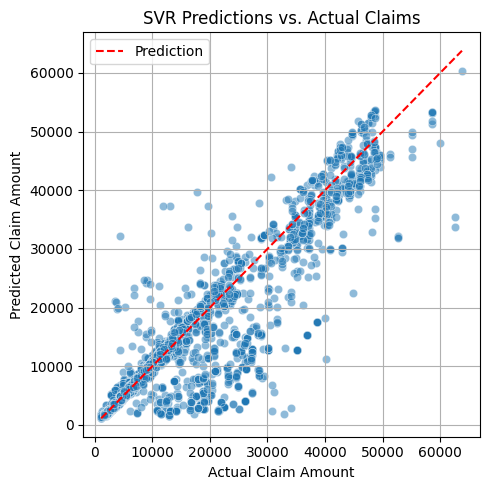

In [34]:
# predicted vs actual claim plot

y_actual = y_test_actual.values.ravel()
y_pred = test_pred_actual.ravel()  

# Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.5)
plt.plot([y_actual.min(), y_actual.max()], 
         [y_actual.min(), y_actual.max()], 
         color='red', linestyle='--', label='Prediction')

plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.title('SVR Predictions vs. Actual Claims')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Linear Regression**

In [35]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [36]:
train_pred = lr.predict(X_train_scaled)
print('RMSE:', np.sqrt(mean_squared_error(y_train_scaled, train_pred)))
test_pred = lr.predict(X_test_scaled)
print('RMSE:', np.sqrt(mean_squared_error(y_test_scaled, test_pred)))

RMSE: 0.460584528630655
RMSE: 0.4735966008537422


In [37]:
lr_train_pred_actual = np.expm1(train_pred)
lr_y_train_actual = np.expm1(y_train_scaled)

lr_test_pred_actual = np.expm1(test_pred)
lr_y_test_actual = np.expm1(y_test_scaled)

lr_rmse_train = np.sqrt(mean_squared_error(lr_y_train_actual, lr_train_pred_actual))
lr_rmse_test = np.sqrt(mean_squared_error(lr_y_test_actual, lr_test_pred_actual))

print('RMSE for training data:',lr_rmse_train)
print('RMSE for test data:',lr_rmse_test)

RMSE for training data: 8319.822169037056
RMSE for test data: 8976.244348877437


In [38]:
lr.coef_

array([[ 0.47631489, -0.04176109,  0.04865561, -0.1101235 ,  0.11049392,
         0.56041489, -0.00340391, -0.00303668,  0.02651889,  0.00912256,
         0.00492284]])

In [39]:
lr_mape_train = mean_absolute_percentage_error(lr_y_train_actual, lr_train_pred_actual) * 100
lr_mape_test = mean_absolute_percentage_error(lr_y_test_actual, lr_test_pred_actual) * 100

print(f"Train MAPE: {lr_mape_train:.2f}%")
print(f"Test MAPE: {lr_mape_test:.2f}%")

Train MAPE: 27.85%
Test MAPE: 28.86%


# *Model performance analysis*

In [230]:
print("Performance of various ML models used:")
print('--------------------------------------')
print(f"Test Mean absolute error for Linear Regression: {lr_mape_test:.2f}%")
print(f"Test Mean absolute error for Support Vector Regressor:{mape_test:.2f}%")
print(f"Test Mean absolute error for Random Forest Regressor:{mape_test_rfgs:.2f}%")
print(f"Test Mean absolute error for XG Regressor:{xgb_mape_test:.2f}%")

Performance of various ML models used:
--------------------------------------
Test Mean absolute error for Linear Regression: 28.86%
Test Mean absolute error for Support Vector Regressor:15.20%
Test Mean absolute error for Random Forest Regressor:13.71%
Test Mean absolute error for XG Regressor:9.05%
